# Project 1

## Selected 15 random stocks and 

## 1. Calculated risk and reward potential
## 2. Compared covariance and correlation
## 3. Find best 5 to invest in long term


/var/folders/3m/tjc2t64x5yn69nlb2szmcdlm0000gn/T/ipykernel_9604/1136976530.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stocks = yf.download(ticker, start = "2010-01-01", end = "2021-01-01")
[*********************100%***********************]  15 of 15 completed


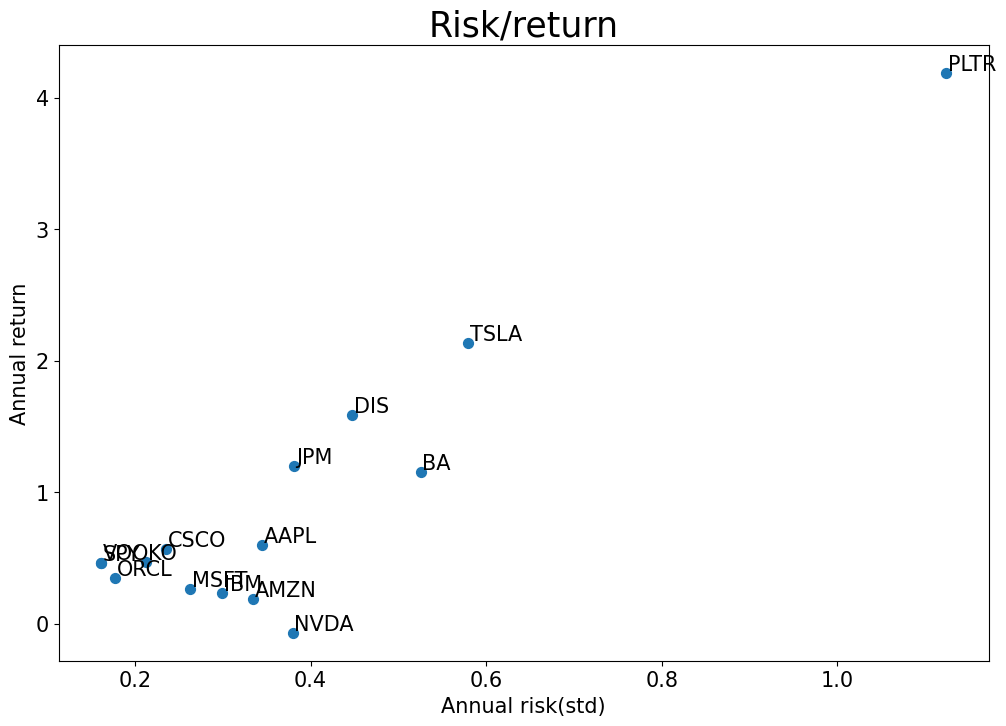

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker = ["SPY", "AAPL", "KO", "IBM", "DIS", "MSFT", "NVDA", "TSLA", "ORCL", "JPM", "AMZN", "BA", "PLTR", "VOO", "CSCO"]
stocks = yf.download(ticker, start = "2010-01-01", end = "2021-01-01")

# Get only the close data
close = stocks.loc[:,"Close"].copy()

# Risk / Return 

# Remove all NaN
ret = close.pct_change().dropna()

# Get just the two relevant columns to calculate risk and reward
summary = ret.describe().T.loc[:,["mean","std"]]

# Comparing risk and reward
summary["mean"]= summary["mean"]*252 # mean annual return
summary["std"] = summary["std"]*np.sqrt(252) # std = volatility(risk), and volatility scales with sqrt of time

# x axis std, y axis mean
summary.plot.scatter(x="std",y="mean",figsize=(12,8),s=50,fontsize=15)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.002, summary.loc[i,"mean"]+0.02), size=15)
plt.xlabel("Annual risk(std)",fontsize=15)
plt.ylabel("Annual return",fontsize=15)
plt.title("Risk/return",fontsize=25)
plt.show()

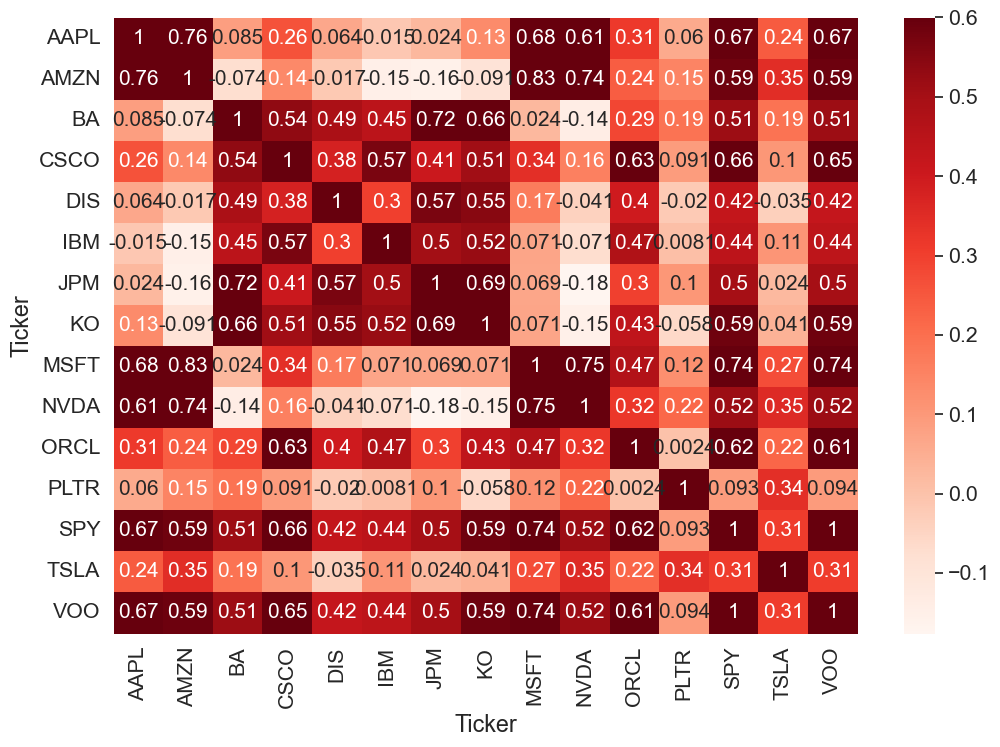

In [5]:
# Correlation and Covariance 
# Heatmap for corr and cov
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=0.6)
plt.show()

# Final 5 stocks

## 1. Risk/ Return Tradeoff

### High returns, higher risk:

#### PLTR (Palantir) stands out with the highest return (4.2%) but also relatively high risk (1.1).

#### TSLA (Tesla) also has good returns (2.2%) with moderate risk (0.6).

### Moderate returns, moderate risk:

#### DIS (Disney) and BA (Boeing) show ~1.5–1.7% returns with ~0.5–0.6 risk.

#### JPM (JP Morgan) offers similar ~1.5% return with relatively low risk (0.4).

### Low returns, low risk:

#### Large caps like AAPL, AMZN, MSFT, NVDA cluster around very low annual returns (<1%) with modest risk.

## 2. Correlation Diversification
### From the heatmap:

#### AAPL, AMZN, MSFT, NVDA are all highly correlated (>0.7). Owning too many of them doesn’t diversify much.

#### TSLA and PLTR are less correlated with the big tech cluster (~0.2–0.3), so they add diversification.

#### DIS, JPM, BA show moderate correlation (~0.4–0.5) with tech, so they also diversify.

## Final Porfolio Verdict:
### To balance return, risk, and correlation:

#### PLTR — highest return, adds diversification.

#### TSLA — good return, moderate correlation with others.

#### DIS — stable consumer/entertainment exposure, diversifies away from tech.

#### JPM — financial sector, relatively low risk, moderate return.

#### MSFT (or AAPL) — blue-chip tech anchor, stable and highly liquid.



# Project 2

## Take the 5 stocks and plot the moving averages and graph it

/var/folders/3m/tjc2t64x5yn69nlb2szmcdlm0000gn/T/ipykernel_9604/2063191574.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Stocks = yf.download(ticker, start = "1993-01-29", end = "2022-01-05")
[*********************100%***********************]  5 of 5 completed


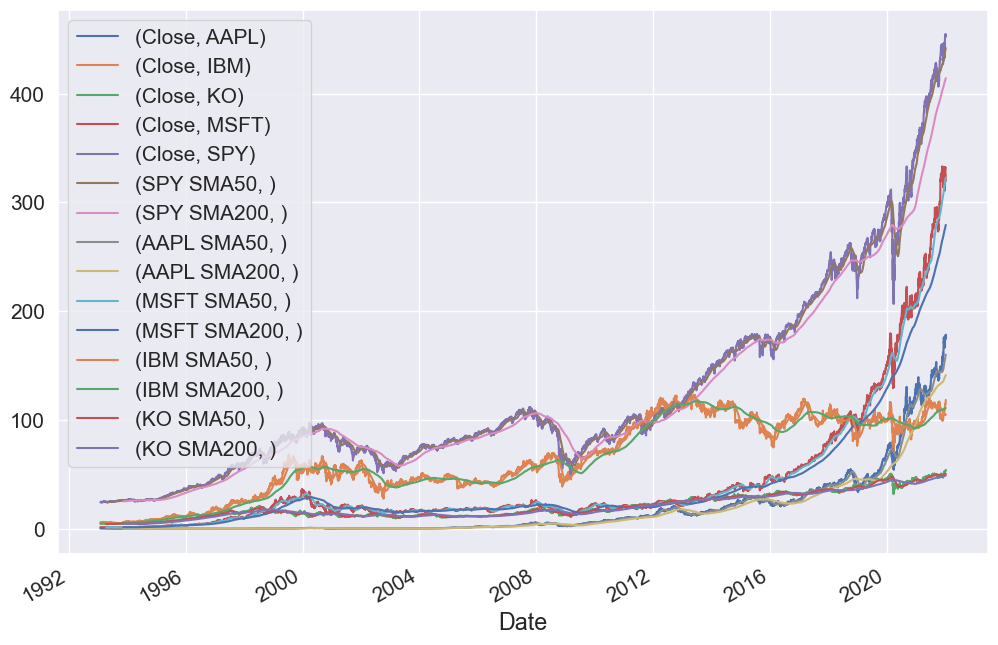

In [20]:
ticker = ["SPY", "AAPL", "MSFT", "IBM", "KO",]
Stocks = yf.download(ticker, start = "1993-01-29", end = "2022-01-05")

# Getting stocks close data and converting it to a dataframe 
stocks = Stocks[['Close']].copy() 

#stocks[("Close", "SPY")].to_frame()

# Calculate 50 & 200 day moving average: If you take a 50-day SMA, each data point is the average of the last 50 stock closing prices.
for t in ticker:
    stocks[( t + " SMA50")] = stocks[("Close", t)].to_frame().rolling(window=50, min_periods=50).mean()
    stocks[( t + " SMA200")] = stocks[("Close", t)].to_frame().rolling(window=200, min_periods=200).mean()


# Code to plot graph 
stocks.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()





# Find the best SMA for the top 5 stocks

# Create a bias strategy

# Compare drawdowns

# Pick the best 3 stocks for your portfolio

In [67]:
# Finding best SMA for top 5 stocks
# Best SMA: decide between short: 10, medium: 50 and long: 100
# Top 5 stocks: Highest cumulative returns
tickers = ["AAPL","MSFT","AMZN","GOOGL","TSLA","NVDA","META","AVGO","JPM","DIS","KO","IBM","ORCL","PEP","V","MA","UNH","XOM","HD","NFLX"] 
Stocks = yf.download(tickers, start = "1980-12-12", end = "2022-01-06")

stocks = Stocks['Close'].copy() 


# Obtaining the top 5 cumulative returns
"""
Step 1: stocks.shift(1)
This shifts the entire series (or DataFrame) down by 1 row.

So today’s value is aligned with yesterday’s value.

Useful for return calculations, since returns are based on the change between today and yest

Step 2: stocks.div(stocks.shift(1))
This divides today’s price by yesterday’s price:
Example: if yesterday’s close = 100, today’s close = 102 → result = 102/100 = 1.02.

Step 3: np.log(...)
Applies the natural logarithm to the ratio:

This is the log return
"""
for t in tickers:
    # daily log returns
    stocks[t + "_d_returns"] = np.log(stocks[t] / stocks[t].shift(1))

    # cumulative returns
    stocks[t + "_cummreturns"] = stocks[t + "_d_returns"].cumsum().apply(np.exp)


stocks.dropna(inplace=True)
stocks

# Dictionary to store final cumulative return for each stock
final_cum_returns = {}

for t in tickers:
    final_cum_returns[t] = stocks[t + "_cummreturns"].iloc[-1]

# Convert to Series for easy sorting
final_cum_returns = pd.Series(final_cum_returns)

# Sort and get top 5
top5 = final_cum_returns.sort_values(ascending=False).head(5)

top5






/var/folders/3m/tjc2t64x5yn69nlb2szmcdlm0000gn/T/ipykernel_9604/3589395014.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Stocks = yf.download(tickers, start = "1980-12-12", end = "2022-01-06")
[*********************100%***********************]  20 of 20 completed


HD      21983.438271
MSFT     5154.584751
UNH      4099.352454
AAPL     1741.304129
AMZN     1678.533840
dtype: float64

In [82]:
# Find best SMA for top 5 stocks
sma_periods = [10, 50, 100]
best_sma_results = {}

for t in top5.index:  # loop through top 5 tickers
    stock_data = stocks[[t]].copy()

    performance = {}
    for p in sma_periods:
        # Calculate SMA
        stock_data[f"SMA_{p}"] = stock_data[t].rolling(p).mean()

        # Generate signals: 1 if price > SMA else 0
        stock_data[f"Signal_{p}"] = np.where(stock_data[t] > stock_data[f"SMA_{p}"], 1, 0)

        # Strategy daily returns
        """ 
        Calculate daily percentage change and multiply by previous day's signal 
        etc: if price goes from 100 → 102, return = 2%.
        1 means you were holding the stock yesterday → you earn today’s return.
        0 means you were out of the stock yesterday → you earn nothing today 
        """
        stock_data[f"StratRet_{p}"] = stock_data[t].pct_change() * stock_data[f"Signal_{p}"].shift(1)
        

        # FINAL Cumulative return of strategy
        cum_return = stock_data[f"StratRet_{p}"].cumsum().apply(np.exp).iloc[-1]
        performance[p] = cum_return

    # Pick best period based on return
    best_period = max(performance, key=performance.get)
    best_sma_results[t] = (best_period, performance[best_period])

# Show best SMA per stock
best_sma_results

{'HD': (50, np.float64(4.6473046674936995)),
 'MSFT': (100, np.float64(3.677810036422042)),
 'UNH': (100, np.float64(3.852619873653839)),
 'AAPL': (100, np.float64(5.767607203090908)),
 'AMZN': (50, np.float64(4.929262256315572))}

In [91]:
# Bias strategy: Long bias strategy: 
""" 
If today’s closing price is above the SMA, the algorithm interprets this as an uptrend.
→ Buy or hold the asset.
If the price is below the SMA, the algorithm avoids taking a position.
→ Stay out of the market.
stock_data[f"Signal_{p}"] = np.where(stock_data[t] > stock_data[f"SMA_{p}"], 1, 0)
"""

# Comparing drawdowns 
# Drawdown = Cummulative max - Cummulative returns
# ** Drawdown measures the decline of an investment from its peak value

top5_names = top5.index.tolist()
top5_stocks = yf.download(top5_names, start = "1980-12-12", end = "2022-01-06")
top5_stocks = top5_stocks["Close"].copy()
top5_stocks.dropna(inplace=True)
period = 100
drawdowns = {}

for each in top5_names:
    """
    Step 1: apple.shift(1)
    This shifts the entire series (or DataFrame) down by 1 row.
    
    So today’s value is aligned with yesterday’s value.
    
    Useful for return calculations, since returns are based on the change between today and yest
    
    Step 2: apple.div(apple.shift(1))
    This divides today’s price by yesterday’s price:
    Example: if yesterday’s close = 100, today’s close = 102 → result = 102/100 = 1.02.
    
    Step 3: np.log(...)
    Applies the natural logarithm to the ratio:
    
    This is the log return
    """
    d_returns = np.log(top5_stocks[each] / top5_stocks[each].shift(1))
    top5_stocks[each + " d_returns"] = d_returns * stock_data[f"Signal_{period}"].shift(1)

    # What you would get if you had invested $1 into the stock as of the start time
    # This is log returns are so powerful — they make cumulative returns additive, 
    # and a single exponential at the end converts them back to the usual multiplicative return.
    top5_stocks[each + " cumreturns"] = top5_stocks[each + " d_returns"].cumsum().apply(np.exp)
    
    top5_stocks[each + " cummax"] = top5_stocks[each + " cumreturns"].cummax()
    top5_stocks[each + " drawdown"] = top5_stocks[each + " cummax"] - top5_stocks[each + " cumreturns"]

    # Get percentage change 
    top5_stocks[each + " drawdown%"] = (top5_stocks[each + " cummax"] - top5_stocks[each + " cumreturns"]) / top5_stocks[each + " cummax"]
    drawdowns[each] = top5_stocks[each + " drawdown%"].max()

# Convert to Series for easy sorting
final_drawdowns = pd.Series(drawdowns)

# Sort 
final_drawdowns = final_drawdowns.sort_values(ascending=False).head(5)

final_drawdowns




/var/folders/3m/tjc2t64x5yn69nlb2szmcdlm0000gn/T/ipykernel_9604/2761069494.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  top5_stocks = yf.download(top5_names, start = "1980-12-12", end = "2022-01-06")
[*********************100%***********************]  5 of 5 completed


AMZN    0.436213
AAPL    0.417907
MSFT    0.264580
HD      0.236072
UNH     0.203177
dtype: float64

# Pick best 3 stocks for my portfolio based on my trading strategy

## Balancing growth potential (returns), strategy robustness (SMA performance), and risk (drawdown):

### HD → best risk/return trade-off.

### UNH → safest drawdown with decent return.

### AAPL → highest growth, still competitive on risk-adjusted basis.